# Transformada Discreta de Fourier (DFT)

## Franco Rissotto

### Importación de modulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Declaración de funciones

In [2]:
# Funcion senoidal
#
# Tiene tres parametros obligatorios: la frecuencia de sampleo, el numero de 
# muestras, y la frecuencia del seno. Retorna el vector temporal y los valores 
# del seno.
def mi_funcion_sen(fs, nn, ff, vmax = 1, dc = 0, ph = 0):

    ts = 1/fs # Tiempo de muestreo (s)
    t_simul = nn*ts # Tiempo de simulacion (s)

    # Vector de tiempo
    tt = np.arange(start = 0, stop = t_simul, step = ts)

    # Calculo de la senoidal, fase en radianes
    xx = vmax*np.sin(2*np.pi*ff*tt + ph) + dc
    
    return tt, xx


# Funcion DFT
# 
# Requiere una secuencia como parametro y devuelve la transformada
def mi_DFT(xx):
    
    N = len(xx)
    XX = np.zeros(N, dtype = complex)
    
    # Recorre todas las frecuencias k
    for k in range(N):
        
        # Recorre todos los valores de n, adicionando la multiplicacion de Xn
        # por la exponencial en cada vuelva para tener el valor total Xk al 
        # final
        for n in range(N):
            XX[k] += xx[n] * np.exp(-2j*np.pi*k*n/N)
        
    return XX

### Ejemplo de uso

In [3]:
fs = 200  # Frecuencia de muestreo (Hz)
N = 200   # Cantidad de muestras

tt, xx10 = mi_funcion_sen(ff = 10, nn = N, fs = fs)
tt, xx30 = mi_funcion_sen(ff = 30, nn = N, fs = fs)
tt, xx50 = mi_funcion_sen(ff = 50, nn = N, fs = fs)

xx = xx10 + xx30 + xx50

# Eje frecuencial del cual sera usado solo una mitad para no ver repetido el
# espectro en este caso
f = np.arange(start = 0, stop = fs, step = fs/N)
bfrec = f <= fs/2

XX = mi_DFT(xx)

### Visualización

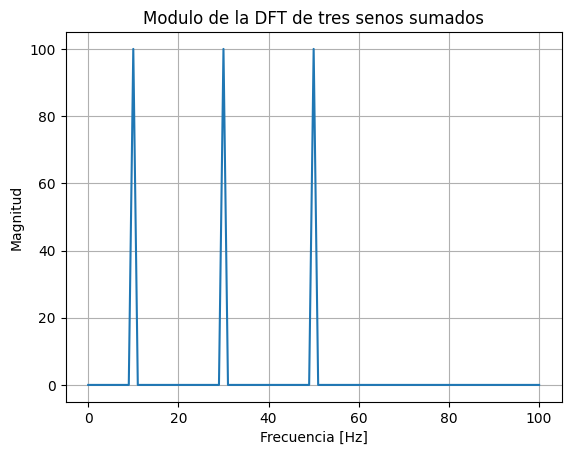

In [4]:
plt.plot(f[bfrec], np.abs(XX[bfrec]))
plt.title("Modulo de la DFT de tres senos sumados")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid()